<a href="https://colab.research.google.com/github/Macostik/ML_cource/blob/main/HomeWork17/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## Load data


In [2]:
# Load data
data = pd.read_csv('/content/T10Y2Y.csv', na_values='.')

## Data Pre-Processing

In [3]:
# Convert data
data['DATE'] = pd.to_datetime(data['DATE'])

# Remove emtpy data
data = data.dropna(axis=0, how='any', )

# Convert to float
data['T10Y2Y'] = data['T10Y2Y'].astype(float)

# Rename columns
data.rename(columns={'DATE': 'ds', 'T10Y2Y': 'y'}, inplace=True)

# Get info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1252 non-null   datetime64[ns]
 1   y       1252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.3 KB


In [4]:
# Visualize dataframe
data.head()

,ds,y
0,2019-07-18,0.27
1,2019-07-19,0.25
2,2019-07-22,0.25
3,2019-07-23,0.25
4,2019-07-24,0.22


## Visualize, visualize, visualize ...

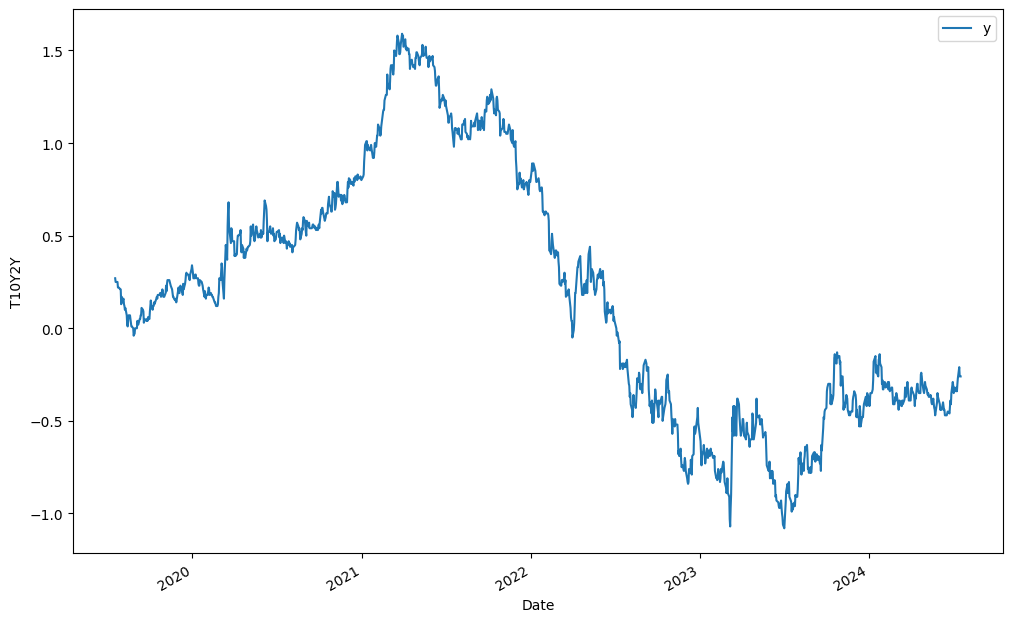

In [5]:
# Plot dataframe
ax = data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('T10Y2Y')
ax.set_xlabel('Date')

plt.show()

In [6]:
# Let's see how to change target depending on time
data['lag1'] = data['y'].shift(1)
data['lag2'] = data['y'].shift(2)
data['rolling_mean'] = data['y'].rolling(window=3).mean()
data['rolling_std'] = data['y'].rolling(window=3).std()
data['frequency'] = np.fft.fftfreq(len(data['y']))
data['amplitude'] = np.abs(np.fft.fft(data['y']))
data = data.dropna(axis=0, how='any', )
data.head()

,ds,y,lag1,lag2,rolling_mean,rolling_std,frequency,amplitude
2,2019-07-22,0.25,0.25,0.27,0.256667,0.011547,0.001597,160.564453
3,2019-07-23,0.25,0.25,0.25,0.250000,0.000000,0.002396,47.104744
4,2019-07-24,0.22,0.25,0.25,0.240000,0.017321,0.003195,50.442971
5,2019-07-25,0.22,0.22,0.25,0.230000,0.017321,0.003994,21.631945
6,2019-07-26,0.22,0.22,0.22,0.220000,0.000000,0.004792,29.833154


## Prophet

## Train Model

In [7]:
# Create model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01)

# Train model
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1mkes0v/2cmzlkcz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1mkes0v/vf01p9hd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1969', 'data', 'file=/tmp/tmpd1mkes0v/2cmzlkcz.json', 'init=/tmp/tmpd1mkes0v/vf01p9hd.json', 'output', 'file=/tmp/tmpd1mkes0v/prophet_modelz8ny7i1e/prophet_model-20241230215347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Validate data

In [8]:
# Cross validation
data_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate errors
mae = mean_absolute_error(data_cv['y'], data_cv['yhat'])
mse = mean_squared_error(data_cv['y'], data_cv['yhat'])
rmse = root_mean_squared_error(data_cv['y'], data_cv['yhat'])

print(f'-------------------------------')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'-------------------------------')

INFO:prophet:Making 5 forecasts with cutoffs between 2021-07-29 00:00:00 and 2023-07-19 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1mkes0v/00l25alg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1mkes0v/3hc0pyly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29404', 'data', 'file=/tmp/tmpd1mkes0v/00l25alg.json', 'init=/tmp/tmpd1mkes0v/3hc0pyly.json', 'output', 'file=/tmp/tmpd1mkes0v/prophet_modeln1x59sdr/prophet_model-20241230215349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:53:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:53:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1mkes0v/lzhek7u9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd1mkes0v/qnsjn0is.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

-------------------------------
Mean Absolute Error: 0.54
Mean Squared Error: 0.47
Root Mean Squared Error: 0.69
-------------------------------


## Prediction data

In [9]:
# Dataframe extends into the future a specified number of days
future = model.make_future_dataframe(periods=30, freq='D')

# Predict
forecast = model.predict(future)

# Assign each row in future a predicted value which it names "yhat"
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1275,2024-08-13,-0.184075,-0.330427,-0.037478
1276,2024-08-14,-0.182815,-0.329733,-0.032244
1277,2024-08-15,-0.181555,-0.337765,-0.040848
1278,2024-08-16,-0.180295,-0.324928,-0.029424
1279,2024-08-17,-0.179035,-0.333303,-0.033448


## Visualize prediction

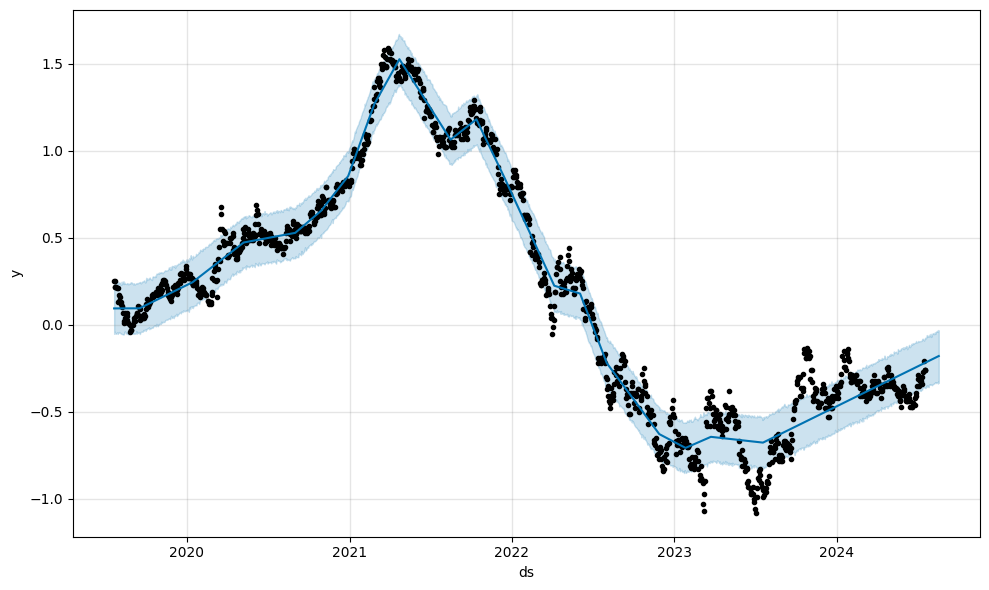

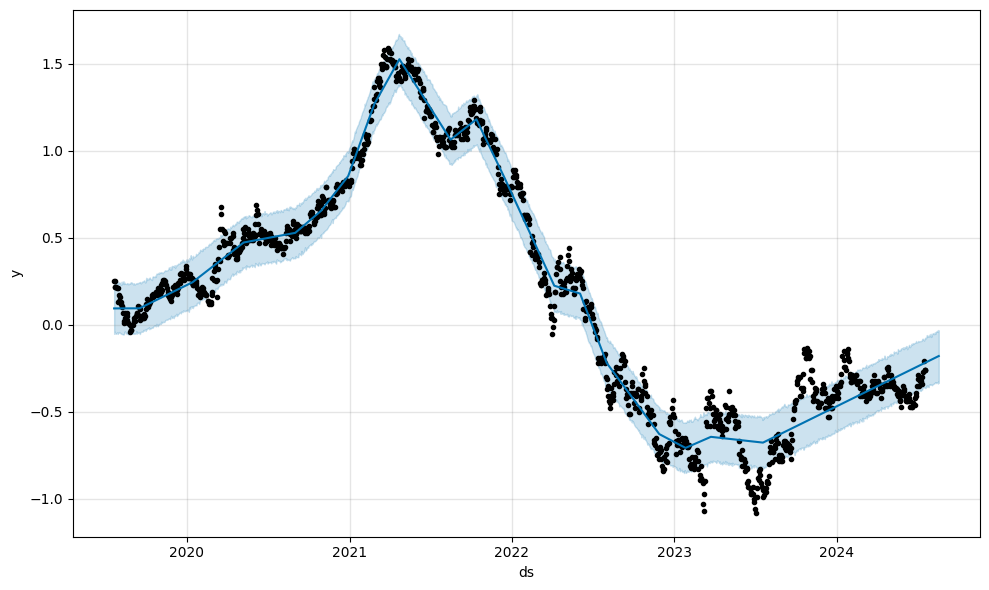

In [10]:
model.plot(forecast, uncertainty=True)

## Darts

In [11]:
!pip install darts

In [12]:
from darts import TimeSeries

## Load data again

In [13]:
# Load data
df = pd.read_csv('/content/T10Y2Y.csv')

## Data Pre-processing

In [14]:
# Convert to numeric
df['T10Y2Y'] = pd.to_numeric(df['T10Y2Y'], errors='coerce')

# Remove empty data
df['T10Y2Y'] = df['T10Y2Y'].fillna(method='ffill')

# Convert to data time
df['DATE'] = pd.to_datetime(df['DATE'])

<ipython-input-14-9ea1cc27c7a4>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['T10Y2Y'] = df['T10Y2Y'].fillna(method='ffill')


In [15]:
# Create Time Series
series = TimeSeries.from_dataframe(df, 'DATE', 'T10Y2Y')

# Crete threshold
threshold = df['DATE'].quantile(0.8)

In [16]:
from darts.models import ExponentialSmoothing

# Split data
train, test = series.split_before(threshold)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## Train Model

In [17]:
# Create Exponential Smoothing model
model = ExponentialSmoothing(seasonal_periods=297)

# Train model
model.fit(train)

# Make prediction
prediction = model.predict(len(test))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Visualize

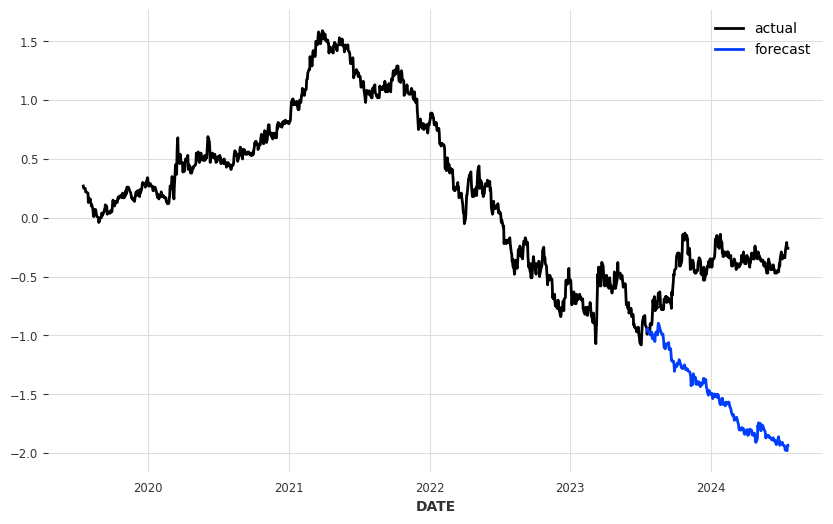

In [18]:
# Plot prediction
plt.figure(figsize=(10, 6))
series.plot(label='actual')
prediction.plot(label='forecast', lw=2)
plt.legend()
plt.show()

## Conclusion:

I conducted an experiment to predict the 10-Year Treasury Constant Maturity rate using two forecasting models: Prophet and Darts. Interestingly, the models produced contrasting results. Prophet forecasts that starting from mid-2023, the interest rate will increase steadily through 2024 and beyond. In contrast, Darts, using the same data, predicts an opposite trend, indicating a decline in the interest rate from the same period. This experiment provided a valuable opportunity to delve into the mechanics of time series forecasting. I examined how each model processes historical data, identifies patterns, and generates future predictions. The differing results highlight the unique methodologies and assumptions underlying each model, offering insights into their strengths, limitations, and potential applications in financial forecasting.